###  Problem Statement

#### Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
#### An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
#### For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.
#### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
#### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 
#### Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## To predict whether the customer would be interested in Vehicle insurance.

In [1]:
!pip install imblearn

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

In [3]:
train = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\cross sell hackathoon\train.csv')
test = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\cross sell hackathoon\test.csv')
submission = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\cross sell hackathoon\sample_submission_iA3afxn.csv')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train.shape, test.shape

((381109, 12), (127037, 11))

In [6]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
train['source'] = 'train'
test['source'] = 'test'

In [9]:
train.select_dtypes(include='object')

,Gender,Vehicle_Age,Vehicle_Damage,source
0,Male,> 2 Years,Yes,train
1,Male,1-2 Year,No,train
2,Male,> 2 Years,Yes,train
3,Male,< 1 Year,No,train
4,Female,< 1 Year,No,train
...,...,...,...,...
381104,Male,1-2 Year,No,train
381105,Male,< 1 Year,No,train
381106,Male,< 1 Year,No,train
381107,Female,> 2 Years,Yes,train


In [10]:
data=pd.concat([train,test])

train.shape, test.shape, data.shape

((381109, 13), (127037, 12), (508146, 13))

In [11]:
display(train.head(1), train.tail(1))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0,train


### before resetting the index

In [12]:
display(test.head(1), test.tail(1))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,source
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,test


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,source
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,test


In [13]:
data.reset_index(drop=True, inplace=True)

### after resetting the index

In [14]:
display(data.head(1), data.tail(1))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
508145,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN,test


In [15]:
train.shape[0], test.shape[0], train.shape[0]+test.shape[0], data.shape[0]

(381109, 127037, 508146, 508146)

## No Missing values

In [16]:
data.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [17]:
for i in data.columns:
    if data[i].dtype=='object':
        nunique = data[i].nunique()
        print(i,':',nunique)

Gender : 2
Vehicle_Age : 3
Vehicle_Damage : 2
source : 2


In [18]:
data['Gender'].value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

In [19]:
# le = LabelEncoder()

In [20]:
# data['Gender'] =le.fit_transform(data['Gender'])

In [21]:
data['Gender'].value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

In [22]:
# data['Vehicle_Damage'] =le.fit_transform(data['Vehicle_Damage'])

In [23]:
data['Vehicle_Damage'].value_counts()

Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64

In [24]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


In [25]:
# univariate analysis

<AxesSubplot:ylabel='Frequency'>

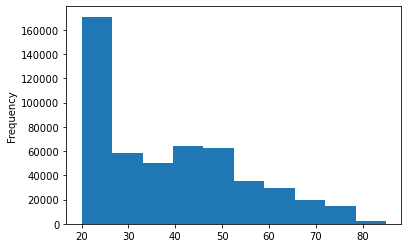

In [26]:
data['Age'].plot(kind='hist')

###  20 to 25 aged people are more 

<AxesSubplot:>

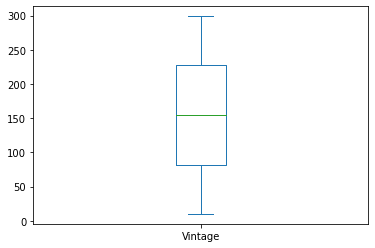

In [27]:
data['Vintage'].plot(kind='box')

### Average 150 days customers has been associated with the company

<AxesSubplot:>

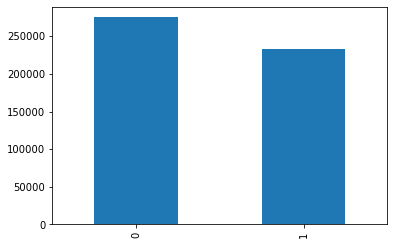

In [28]:
data['Previously_Insured'].value_counts().plot(kind='bar')

### 0 : Customer doesn't have Vehicle Insurance  -- More customers doesnt have

## bivariate analysis

In [29]:
def bivariate_percent_plt(x,y):
    cross = pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar',stacked=True)

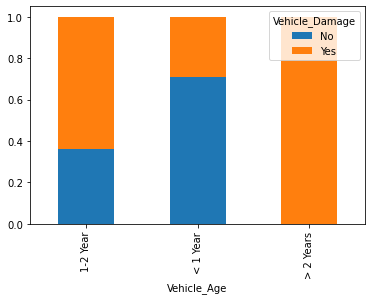

In [30]:
bivariate_percent_plt(data['Vehicle_Age'],data['Vehicle_Damage'])

### obviously , more years, more depreciation

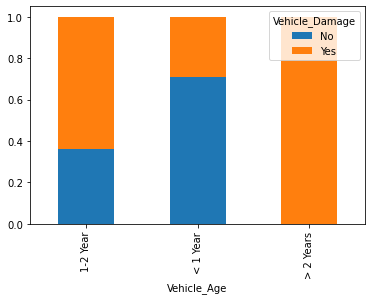

In [31]:
bivariate_percent_plt(data['Vehicle_Age'],data['Vehicle_Damage'])

<AxesSubplot:>

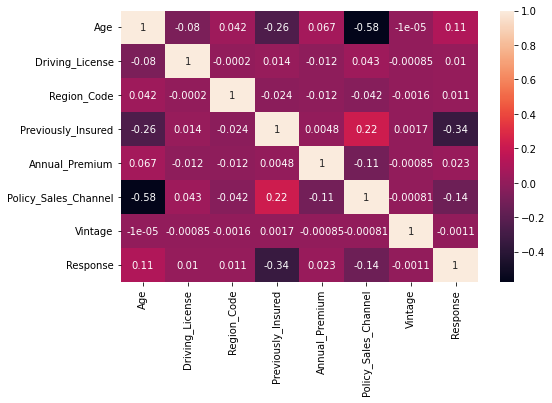

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(data.drop(columns=['id']).corr(),annot=True)

In [33]:
encoded_data = pd.get_dummies(data, columns=['Vehicle_Damage','Gender','Vehicle_Age'])
encoded_data

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source,Vehicle_Damage_No,Vehicle_Damage_Yes,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,40454.0,26.0,217,1.0,train,0,1,0,1,0,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0.0,train,1,0,0,1,1,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1.0,train,0,1,0,1,0,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0.0,train,1,0,0,1,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0.0,train,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,26,1,37.0,1,30867.0,152.0,56,NaN,test,1,0,1,0,0,1,0
508142,508143,38,1,28.0,0,28700.0,122.0,165,NaN,test,0,1,1,0,1,0,0
508143,508144,21,1,46.0,1,29802.0,152.0,74,NaN,test,1,0,0,1,0,1,0
508144,508145,71,1,28.0,1,62875.0,26.0,265,NaN,test,1,0,0,1,1,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  source                508146 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 50.4+ MB


In [35]:
mmsc = StandardScaler()

In [36]:
data_numbers = data.select_dtypes(include=np.number)

In [37]:
scale = mmsc.fit_transform(data_numbers.drop(columns=['id','Response']))

In [38]:
data_numbers = pd.DataFrame(scale, columns=data_numbers.drop(columns=['id','Response']).columns)

In [39]:
data_numbers.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [40]:
df = pd.concat([data_numbers, encoded_data,  data[['id','Response']]], axis = 1)

### Remove the unwanted columns

In [41]:
df.loc[:,~df.columns.duplicated()].copy()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,id,Response,source,Vehicle_Damage_No,Vehicle_Damage_Yes,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0.334938,0.045482,0.120487,-0.920485,0.577349,-1.584926,0.748905,1,1.0,train,0,1,0,1,0,0,1
1,2.399432,0.045482,-1.769885,-0.920485,0.173886,-1.584926,0.342540,2,0.0,train,1,0,0,1,1,0,0
2,0.528484,0.045482,0.120487,-0.920485,0.451376,-1.584926,-1.521956,3,1.0,train,0,1,0,1,0,0,1
3,-1.148918,0.045482,-1.164966,1.086384,-0.112877,0.737827,0.581578,4,0.0,train,1,0,0,1,0,1,0
4,-0.632794,0.045482,1.103481,1.086384,-0.178371,0.737827,-1.378534,5,0.0,train,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508141,-0.826341,0.045482,0.801021,1.086384,0.018228,0.737827,-1.175351,508142,NaN,test,1,0,1,0,0,1,0
508142,-0.052155,0.045482,0.120487,-0.920485,-0.108153,0.184791,0.127406,508143,NaN,test,0,1,1,0,1,0,0
508143,-1.148918,0.045482,1.481555,1.086384,-0.043884,0.737827,-0.960217,508144,NaN,test,1,0,0,1,0,1,0
508144,2.076855,0.045482,0.120487,1.086384,1.884958,-1.584926,1.322596,508145,NaN,test,1,0,0,1,1,0,0


In [42]:
train_preprocessed = df[df['source']=='train'].drop(columns='source')
test_preprocessed = df[df['source']=='test'].drop(columns=['source', 'Response'])

In [43]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)

### Modelling

In [44]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
train = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\train_preprocessed.csv')

In [46]:
test = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\test_preprocessed.csv')

In [47]:
sm = SMOTE(random_state=45)

In [48]:
X =train.drop(columns=['id',"Response"])

In [49]:
y =train['Response']

In [50]:
X, y = sm.fit_resample(X,y)

In [51]:
X.shape

(668798, 23)

In [52]:
train_X, test_X, train_y , test_y = train_test_split(X,y, test_size=0.2, random_state=24, stratify=y)

In [69]:
def run_model_evaluate(model,train_X, train_y,test_X, test_y, X,y,test,filename):
    model.fit(train_X, train_y)
    train_pred = model.predict_proba(train_X)
    test_pred = model.predict_proba(test_X)
    print('train_roc_auc_score:' , roc_auc_score(train_y,train_pred[:,1]))
    print('test_roc_auc_score:' ,roc_auc_score(test_y,test_pred[:,1]))
    model.fit(X,y)
    pred = model.predict(test.drop(columns=['id']))
    test['Response'] = pred
    Output = test[['id','Response']]
    Output.to_csv(filename, index  = False)

In [61]:
logistic_reg =LogisticRegression()
run_model_evaluate(logistic_reg,train_X, train_y,test_X, test_y, X,y,test,'Logistic_cross_sell.csv')

train_roc_auc_score: 0.6596444559067035
test_roc_auc_score: 0.6591180979537729


In [63]:
rf =RandomForestClassifier(n_estimators=200,max_depth=8)
run_model_evaluate(rf,train_X, train_y,test_X, test_y, X,y,test,'random_cross_sell.csv')

train_roc_auc_score: 1.0
test_roc_auc_score: 0.9999999999999999


In [73]:
NB =BernoulliNB()
run_model_evaluate(NB,train_X, train_y,test_X, test_y, X,y,test,'naivebayes_cross_sell.csv')

train_roc_auc_score: 0.9999661502258038
test_roc_auc_score: 0.9999755095894096
